
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the Florida Retirement System.  Construct portfolios from the Investment Options in the Florida Retirement System and examine the results of different weighting schemes.  See https://www.myfrs.com/InvestmentFundTabs.htm


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['florida-retirement-system']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
0,FRS Money Market Fund (60),Cash Equivalents:Money Markets,0.68,1.75,1.41,0.25,1.41,5.64
1,FRS Inflation Sensitive Fund (300),Bonds,4.01,3.54,4.94,9.31,4.94,0.53
2,FRS U.S.Bond Enhanced Index Fund (80),Bonds:Investment Grade,7.77,5.43,4.52,3.44,4.52,1.31
3,FRS Core Plus Bond Fund (310),Bonds:High Yield,8.59,6.25,5.94,4.80,5.94,1.24
4,FRS U.S. Stock Market Index Fund (120),US Stocks,20.99,14.56,15.52,19.69,15.52,0.79
5,FRS U.S. Stock Fund (340),US Stocks,18.97,12.16,14.28,22.53,14.28,0.63
6,FRS Foreign Stock Index Fund (200),Bonds:Preferred Stock,11.48,5.17,9.46,18.60,9.46,0.51
7,FRS Global Stock Fund (210),Global Stocks,33.78,18.13,16.84,19.34,16.84,0.87
8,FRS Foreign Stock Fund (220),Global Stocks,25.27,10.74,12.47,19.13,12.47,0.65
9,FRS Retirement Fund (2000),Balanced:Moderate Allocation (40/60),10.25,6.82,7.48,8.19,7.48,0.91


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
4,FRS U.S. Stock Market Index Fund (120),US Stocks,20.99,14.56,15.52,19.69,15.52,0.79
5,FRS U.S. Stock Fund (340),US Stocks,18.97,12.16,14.28,22.53,14.28,0.63
7,FRS Global Stock Fund (210),Global Stocks,33.78,18.13,16.84,19.34,16.84,0.87
8,FRS Foreign Stock Fund (220),Global Stocks,25.27,10.74,12.47,19.13,12.47,0.65
0,FRS Money Market Fund (60),Cash Equivalents:Money Markets,0.68,1.75,1.41,0.25,1.41,5.64
2,FRS U.S.Bond Enhanced Index Fund (80),Bonds:Investment Grade,7.77,5.43,4.52,3.44,4.52,1.31
3,FRS Core Plus Bond Fund (310),Bonds:High Yield,8.59,6.25,5.94,4.80,5.94,1.24
1,FRS Inflation Sensitive Fund (300),Bonds,4.01,3.54,4.94,9.31,4.94,0.53
9,FRS Retirement Fund (2000),Balanced:Moderate Allocation (40/60),10.25,6.82,7.48,8.19,7.48,0.91
10,FRS Retirement Fund (2020),Balanced:Growth Allocation (60/40),10.45,7.11,8.51,9.48,8.51,0.90


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Retirement Fund (2025)': 1/3
}

# put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'Securian AM S&P 500 Index': 0.50,
    'FRS Inflation Sensitive Fund (300)': 0.50
}

# top dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/5,
    'FRS Global Stock Fund (210)': 1/5,
    'FRS Money Market Fund (60)': 1/5,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/5,
    'FRS Retirement Fund (2020)': 1/5
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/2,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Inflation Sensitive Fund (300)': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/2,
    'FRS U.S. Stock Fund (340)': 1/4,
    'FRS Global Stock Fund (210)': 1/4 
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 0.90,
    'FRS Inflation Sensitive Fund (300)': 0.10
}

# janet yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'FRS Inflation Sensitive Fund (300)': 0.50,
    'FRS U.S. Stock Market Index Fund (120)': 0.40,
    'FRS Money Market Fund (60)': 0.10
}

# securian-401k, risk off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'FRS Inflation Sensitive Fund (300)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Money Market Fund (60)': 1/3
}

# securian-401k, risk on: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS Global Stock Fund (210)':1/3,
    'FRS U.S. Stock Fund (340)': 1/3
}

# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = top_dog_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,FRS U.S. Stock Market Index Fund (120),FRS Global Stock Fund (210),FRS Money Market Fund (60),FRS U.S.Bond Enhanced Index Fund (80),FRS Retirement Fund (2020),Top Dog Portfolio
Annual Returns,15.52,16.84,1.41,4.52,8.51,9.36
Std Dev,19.69,19.34,0.25,3.44,9.48,9.67
Sharpe Ratio,0.79,0.87,5.64,1.31,0.90,0.97
Weight,0.33,0.36,0.03,0.10,0.18,1.00
Worst Typical Down Year,-23.86,-21.84,0.91,-2.36,-10.45,-9.97
Black Swan,-43.55,-41.18,0.66,-5.80,-19.93,-19.64


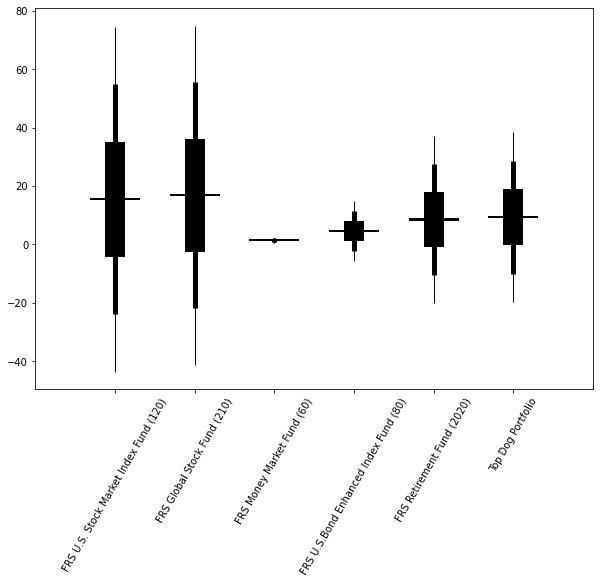

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

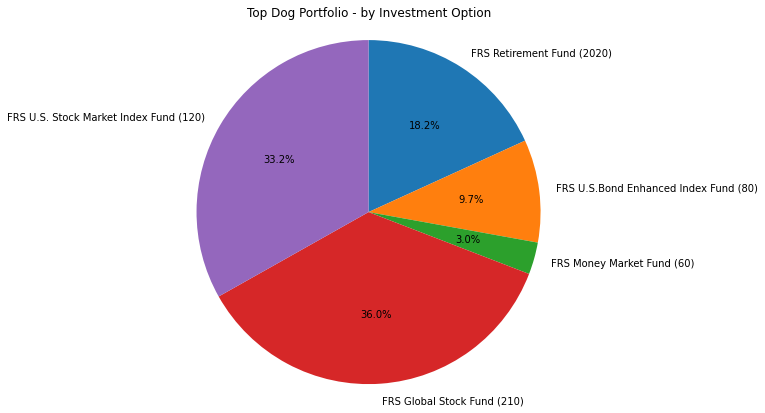

FRS Retirement Fund (2020)               0.18
FRS U.S.Bond Enhanced Index Fund (80)    0.10
FRS Money Market Fund (60)               0.03
FRS Global Stock Fund (210)              0.36
FRS U.S. Stock Market Index Fund (120)   0.33



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Top Dog Portfolio Weights:
    FRS U.S. Stock Market Index Fund (120) 0.3316
    FRS Global Stock Fund (210)    0.3598
    FRS Money Market Fund (60)     0.0301
    FRS U.S.Bond Enhanced Index Fund (80) 0.0966
    FRS Retirement Fund (2020)     0.1818


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...................

Top Dog Portfolio Metrics:          
    max_sharpe_ratio            1.21
    annual_return               8.05
    std_dev                     6.64
    worst typical down year    -5.23
    black_swan                -11.87


Top Dog Portfolio Weights:
    FRS U.S. Stock Market Index Fund (120) 0.0000
    FRS Global Stock Fund (210)    0.2700
    FRS Money Market Fund (60)     0.0000
    FRS U.S.Bond Enhanced Index Fund (80) 0.6800
    FRS Retirement Fund (2020)     0.0500



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).